In [1]:
# load JSON
import json
import pandas as pd
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
figure(figsize=(16, 4))
plt.plot(df['ds'],df['y'])
df.head()

,ds,y
33509,2012-12-31 19:00:00,26.0
29997,2012-12-31 20:00:00,18.0
30093,2012-12-31 21:00:00,45.0
17776,2012-12-31 22:00:00,22.0
12561,2012-12-31 23:00:00,15.0


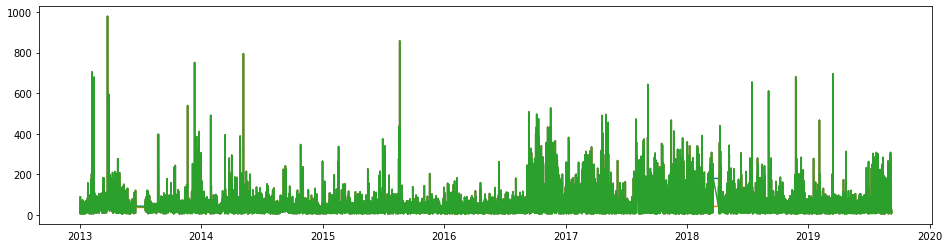

In [2]:
# fill in missing data
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
df_orig = df
df1 = df.ffill() # forward
df2 = df.bfill() # backward
df3 = df.interpolate() # interpolate

figure(figsize=(16, 4))
plt.plot(df1['ds'],df1['y'])
plt.plot(df2['ds'],df2['y'])
plt.plot(df3['ds'],df3['y'])

df = df3

In [3]:
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds')
df.head()

,index,y
ds,,
2012-12-31 19:00:00,33509,26.0
2012-12-31 20:00:00,29997,18.0
2012-12-31 21:00:00,30093,45.0
2012-12-31 22:00:00,17776,22.0
2012-12-31 23:00:00,12561,15.0


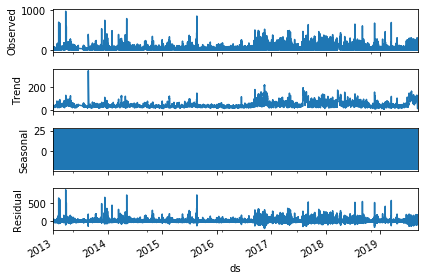

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.y, model='additive',extrapolate_trend='freq', freq=24)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()

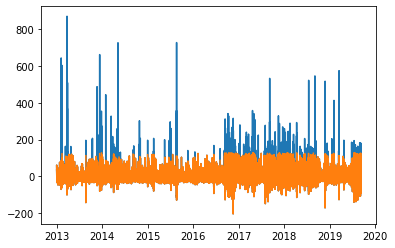

In [5]:
import numpy as np
test = result.resid
plt.plot(test)
m = np.mean(test)
sd = np.std(test)
ind = test > m+4*sd
test[ind] = np.nan
plt.plot(test)

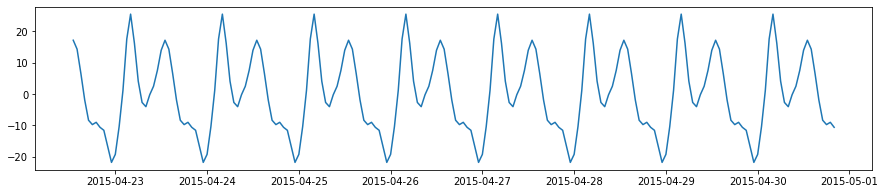

In [11]:
plt.figure(figsize=(15,3))
plt.plot(result.seasonal[20200:20400])